In [86]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize 
plt.ioff()

In [87]:
directory = "galaxy_21cm_spectrum"
files = os.listdir(directory)
file0 = files[0]
files[0]

'spectrum_d_0.69_kpc.txt'

In [88]:
wstr = "wavelngth (cm)"
bstr = "brightness"
def plot_line(data):
    plt.scatter(data[wstr], data[bstr]);
    plt.xlabel(wstr)
    plt.ylabel(bstr)

In [89]:
data0 = pd.read_csv(directory+"\\"+file0, sep=" ")
data0

,wavelngth (cm),brightness
0,20.958084,5.814652
1,20.958168,7.580379
2,20.958252,3.548402
3,20.958336,7.931321
4,20.958420,8.254232
...,...,...
995,21.041664,10.419293
996,21.041748,10.056386
997,21.041832,8.339915
998,21.041916,7.940472


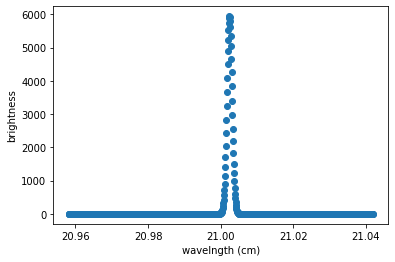

In [90]:
plot_line(data0)
plt.show()

In [91]:
def mygaussian(x,*p):
    u,s,A=p
    return A* np.exp(-(x-u)**2/(2.0*(s**2)))

In [92]:
def gauss_fit(data, guess):
    return scipy.optimize.curve_fit(mygaussian,data[wstr], data[bstr],p0=guess)

[2.10024518e+01 7.01350639e-04 5.94270526e+03]


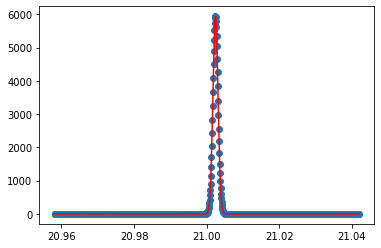

In [93]:
fit = gauss_fit(data0,[21, 0.001, 1])[0]
print(fit)
plt.plot(data0[wstr], mygaussian(data0[wstr], fit[0], fit[1], fit[2]), c="red")
plt.scatter(data0[wstr], data0[bstr])
plt.show()

In [94]:
def plot_line_opt(data, guess = [21, 0.001, 1]):
    fit = gauss_fit(data, guess)[0]
    plt.plot(data[wstr], mygaussian(data[wstr], fit[0], fit[1], fit[2]), c="red")
    plot_line(data)
    return fit[0]
    

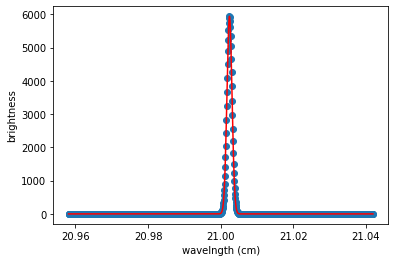

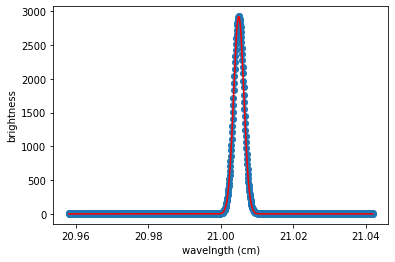

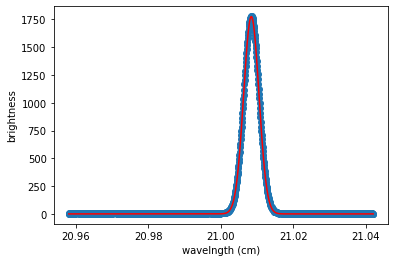

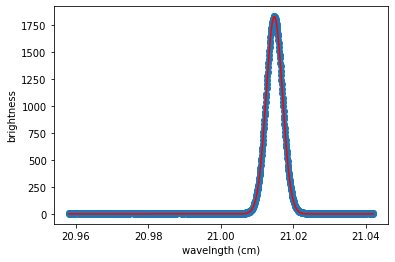

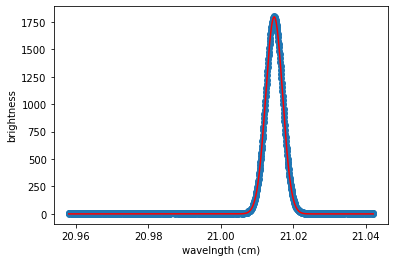

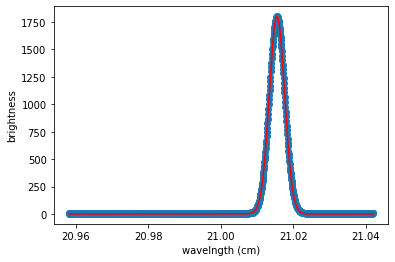

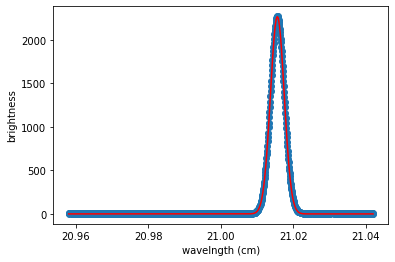

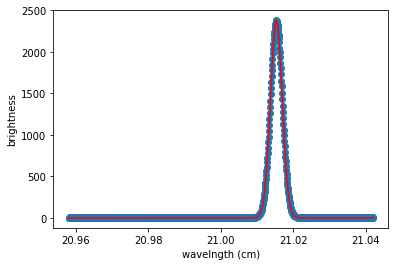

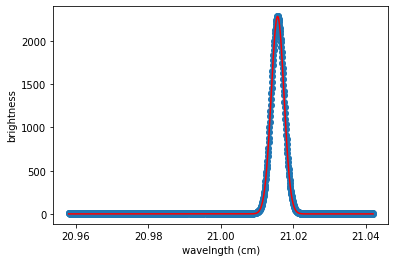

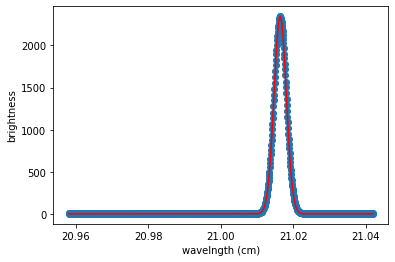

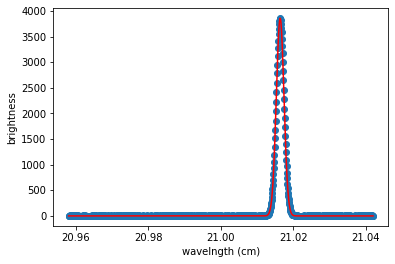

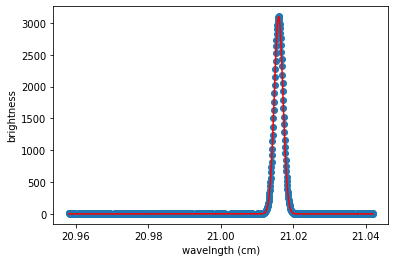

In [95]:
disp_dict={}
#key = distance from centre, value = mean position of 21cm line

for filename in files:
    data1 = pd.read_csv(directory+"\\"+filename, sep=" ")
    mean = plot_line_opt(data1)
    disp_dict[float(filename.lstrip("spectrum_d_").rstrip("_kpc.txt"))] = mean
    plt.show()
#plt.show()

In [96]:
disp_dict

{0.69: 21.002451787335712,
 1.38: 21.00497310253553,
 2.06: 21.008405907090133,
 2.72: 21.014745109702496,
 3.35: 21.01470905338556,
 3.96: 21.015479240722765,
 4.54: 21.015619704233274,
 5.11: 21.015340585857796,
 5.62: 21.01569095796525,
 6.06: 21.016391009932295,
 6.5: 21.016391568138534,
 6.87: 21.01597075453874}

In [97]:
line_21 = 21  #while making the data, he took rest wavelength to be exactly 21cm
c = 2.99792458e5 #km s-1
def disp_to_vel(disp):
    z = (disp - line_21)/line_21
    return c* (((z+1)**2 -1)/((z+1)**2+1))


In [98]:
vel_dict = {}
for key in disp_dict:
    vel_dict[key] = disp_to_vel(disp_dict[key])
vel_dict

{0.69: 34.99925923770342,
 1.38: 70.98676666093733,
 2.06: 119.97729468439722,
 2.72: 210.4247984936857,
 3.35: 209.91042557198816,
 3.96: 220.89758718654383,
 4.54: 222.90133579464725,
 5.11: 218.91962622419135,
 5.62: 223.91778373559606,
 6.06: 233.9039737000844,
 6.5: 233.91193633821837,
 6.87: 227.9091013021638}

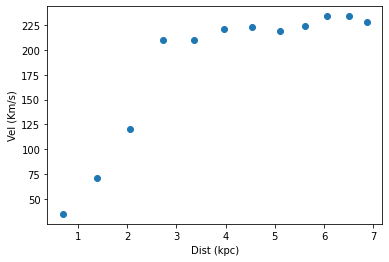

In [99]:
plt.scatter(vel_dict.keys(), vel_dict.values())
plt.xlabel("Dist (kpc)")
plt.ylabel("Vel (Km/s)")
plt.show()